In [38]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [52]:
data_ox = pd.read_csv("OxCGRT_latest.csv",low_memory=False)
data_owid = pd.read_csv("owid-covid-data.csv",low_memory=False)

### data_ox include the oxford data base which include: 

In [40]:
data_ox.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDispla

### Data_owid include the owid data base which include:

In [41]:
data_owid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

####  The table should be: 

#### State: (26 features)

###### Geographic and general state( 9 features): 
(1) CountryName,  <br />
(2) Date,  <br />
(3) population,  <br />
(4) population_density,  <br />
(5) median_age,  <br />
(6) gdp_per_capita,  <br />
(7) aged_65_older/population,  <br />
(8) life_expectancy,  <br />
(9)human_development_index. <br />

###### Corona state (9 features): 
(1) total_cases per million, <br />
(2)total_deaths per million, <br />
(3) new_cases_per_million, <br />
(4) new_deaths_per_million,<br />
(5) new_tests_per_thousand, <br />
(6) positive_rate, <br />
(7) people_fully_vaccinated_per_hundred, <br />
(8)icu_patients_per_million, <br />
(9) StringencyIndex(oxford) <br />

###### Health care state (6 features):  
(1) cardiovasc_death_rate, <br />
(2) diabetes_prevalence, <br />
(3) female_smokers+ male_smokers/population,<br />
(4) hospital_beds_per_thousand, <br />
(5) hosp_patients_per_million, <br />
(6) icu_patients_per_million. <br />


#### Policy: ( 23 features )
(1) C1_School closing,         + 0.5 X(2)  C1_flag <br />
(3) C2_Workplace closing,      + 0.5 X (4)  C2_flag <br />
(5) C3_Cancel public events,   + 0.5 X (6)  C3_flag <br />
(7) C4_Restrictions on gatherings,+  0.5X (8)  C4_flag <br />
(9) C5_Close public transport,    + 0.5X(10) C5_flag  <br />
(11) C6_Stay at home requirements, + 0.5X (12) C6_Flag <br />
(13) C7_Restrictions on internal movement +0.5X(14) C7_Flag <br />
(15) C8_International travel controls, +0.5X(16)C8_Flag  <br />
(17) H1_Public information campaigns, +0.5X(18)H1_Flag <br />
(19) H2_Testing policy, +0.5X (20) H2_Flag <br />
(21) H6_Facial Coverings, +0.5X(22) H6_Flag <br />
(23) C9_Vaccinate_n precetage of the population (new_vaccinations[t+1]/population) <br />


### seir models:

![image info](./images/SEIR-SEIRS.png)

####  (1)

\begin{split}\begin{aligned}
\frac{dS}{dt} & = -\frac{\beta SI}{N}\\
\frac{dE}{dt} & = \frac{\beta SI}{N} - \sigma E\\
\frac{dI}{dt} & = \sigma E - \gamma I\\
\frac{dR}{dt} & = \gamma I
\end{aligned}\end{split}

### We want to learn:
\begin{equation}
\begin{split}
& \beta - \textrm{Rate of spread, the probability of transmitting disease between a susceptible and an infectious individual } \\ 
& \sigma - \textrm{incubation rate, the rate of latent individuals becoming infectious} \\ 
& \gamma - \textrm{Recovery rate, = 1/D, is determined by the average duration, D, of infection}  \\ 
& \xi - \textrm{rate which recovered individuals return to the susceptible state} \\ 
\end{split}
\end{equation}

#### (2) SEIR with vital dynamics: (enabling vital dynamics (births and deaths) )

\begin{split}\begin{aligned}
\frac{dS}{dt} & = \mu N - \nu S - \frac{\beta SI}{N}\\
\frac{dE}{dt} & = \frac{\beta SI}{N} - \nu E - \sigma E\\
\frac{dI}{dt} & = \sigma E - \gamma I - \nu I\\
\frac{dR}{dt} & = \gamma I - \nu R
\end{aligned}\end{split}

### Addition:
\begin{equation}
\begin{split}
& \mu - \textrm{birth rate } \\ 
& \nu - \textrm{death rates} \\ 
\end{split}
\end{equation}

### The output: 
\begin{equation}
\begin{split}
& S- \textrm{susceptible population} \\
& I - \textrm{infected}, \\
& R - \textrm{removed population (either by death or recovery)}\\
& N = S+I+R
\end{split}
\end{equation}

In [53]:
data_owid.date = pd.to_datetime(data_owid['date'],format='%Y-%m-%d')
data_ox.Date = pd.to_datetime(data_ox['Date'],format='%Y%m%d')

In [32]:
data_ox.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_School closing', 'C1_Flag',
       'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDispla

### Actions data base data_ox

In [54]:
data_ox=data_ox.replace(np.nan, 0)

In [55]:
data_ox['C1_index']=(data_ox['C1_School closing']+0.5*data_ox['C1_Flag'])*2
data_ox['C2_index']=(data_ox['C2_Workplace closing']+0.5*data_ox['C2_Flag'])*2
data_ox['C3_index']=(data_ox['C3_Cancel public events']+0.5*data_ox['C3_Flag'])*2
data_ox['C4_index']=(data_ox['C4_Restrictions on gatherings']+0.5*data_ox['C4_Flag'])*2
data_ox['C5_index']=(data_ox['C5_Close public transport']+0.5*data_ox['C5_Flag'])*2
data_ox['C6_index']=(data_ox['C6_Stay at home requirements']+0.5*data_ox['C6_Flag'])*2
data_ox['C7_index']=(data_ox['C7_Restrictions on internal movement']+0.5*data_ox['C7_Flag'])*2
data_ox['C8_index']= data_ox['C8_International travel controls']
data_ox['H1_index']=(data_ox['H1_Public information campaigns']+0.5*data_ox['H1_Flag'])*2
data_ox['H6_index']=(data_ox['H6_Facial Coverings']+0.5*data_ox['H6_Flag'])*2

#data_ox['C9_index'] ----> need the other data base to be done...

data_ox=data_ox.drop(columns=[
            'C1_School closing','C2_Workplace closing','C3_Cancel public events','C4_Restrictions on gatherings'
            ,'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
            'C8_International travel controls','H1_Public information campaigns','H6_Facial Coverings', 
            'C1_Flag','C2_Flag','C3_Flag','C4_Flag','C5_Flag','C6_Flag','C7_Flag', 'H1_Flag','H6_Flag'
            ])

# Delete economic staff
data_ox=data_ox.drop(columns=[
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H7_Vaccination policy', 'H7_Flag', 'M1_Wildcard', 'StringencyIndexForDisplay',
       'StringencyLegacyIndex', 'StringencyLegacyIndexForDisplay',
       'GovernmentResponseIndex', 'GovernmentResponseIndexForDisplay',
        'ContainmentHealthIndexForDisplay',
       'EconomicSupportIndex', 'EconomicSupportIndexForDisplay','Jurisdiction',
       'E1_Income support', 'E1_Flag',
            ])


In [61]:
data_ox.to_csv('modified_Oxford.csv', index=False) 

In [ ]:
data_ox = data_ox.rename(columns={'CountryCode': 'iso_code', 
                                  'Date':'date', 
                                  'ConfirmedCases':'total_cases',
                                  'ConfirmedDeaths':'total_deaths'})

In [64]:
data_ox.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode', 'Date',
       'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'ContainmentHealthIndex', 'C1_index', 'C2_index', 'C3_index',
       'C4_index', 'C5_index', 'C6_index', 'C7_index', 'C8_index', 'H1_index',
       'H6_index'],
      dtype='object')

#### Creating Geographic and General State:

In [66]:
data_owid=data_owid.drop(columns=[
        'iso_code', 'continent', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed',
       'new_cases_smoothed_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
        'hosp_patients',
        'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred',
       'new_vaccinations_smoothed_per_million', 'stringency_index',
       'aged_70_older', 'extreme_poverty',
        'handwashing_facilities'
            ])

In [72]:
data_owid.to_csv('modified_owid.csv', index=False)

In [9]:
data_us_p = pd.read_csv("nst-est2019-alldata.csv")

In [10]:
data_us_vacc= pd.read_csv("us_state_vaccinations.csv")

In [57]:
distance_df = pd.read_csv("distance-matrix.csv")

In [11]:
data_us_vacc.date = pd.to_datetime(data_us_vacc.date, format='%Y-%m-%d')

In [12]:
data_us_vacc = data_us_vacc.rename(columns={'location': 'RegionName'})

In [17]:
us_data_ox = data_ox[data_ox.iso_code == 'USA']
us_data_ox = us_data_ox[us_data_ox['RegionName'].notna()]

In [18]:
data_us_pop = data_us_p.rename(columns = {'NAME':'RegionName', 'POPESTIMATE2019':'population'})[['RegionName','population']]

In [19]:
us_data_ox.shape, data_us_vacc.shape

((22389, 49), (4183, 14))

In [20]:
us_data_state = pd.merge(us_data_ox, data_us_vacc, how='left', on =['RegionName', 'date'])

In [22]:
us_data_state = pd.merge(us_data_state, data_us_pop, how='left', on =['RegionName'])

In [23]:
def state_dict_to_df(state_data, n_rows):
    df = pd.DataFrame(columns=list(state_data.keys()))
    for column, values in state_data.items():
        if isinstance(values, pd.Series):
            df[column] = values.tolist()
        else:
            df[column] = [values] * n_rows
    return df

In [47]:
data_ox_n = data_ox[data_ox.RegionName.isna()]

In [25]:
data_owid.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [26]:
data_ox.columns

Index(['CountryName', 'iso_code', 'RegionName', 'RegionCode', 'Jurisdiction',
       'date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing',
       'C2_Flag', 'C3_Cancel public events', 'C3_Flag',
       'C4_Restrictions on gatherings', 'C4_Flag', 'C5_Close public transport',
       'C5_Flag', 'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'H6_Facial Coverings', 'H6_Flag', 'H7_Vaccination policy', 'H7_Flag',
       'M1_Wildcard', 'total_cases', 'total_deaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'Gove

In [28]:
us_data_state

,CountryName,iso_code,RegionName,RegionCode,Jurisdiction,date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,population
0,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731545.0
1,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731545.0
2,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731545.0
3,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731545.0
4,United States,USA,Alaska,US_AK,STATE_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731545.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22384,United States,USA,Wyoming,US_WY,STATE_TOTAL,2021-03-10,NaN,NaN,NaN,NaN,...,12.25,32.86,70919.0,20.18,44.84,4367.0,3895.0,6730.0,0.733,578759.0
22385,United States,USA,Wyoming,US_WY,STATE_TOTAL,2021-03-11,NaN,NaN,NaN,NaN,...,12.30,32.93,71215.0,20.21,45.44,390.0,3911.0,6758.0,0.725,578759.0
22386,United States,USA,Wyoming,US_WY,STATE_TOTAL,2021-03-12,NaN,NaN,NaN,NaN,...,12.97,34.42,75057.0,21.04,46.65,8662.0,4646.0,8028.0,0.738,578759.0
22387,United States,USA,Wyoming,US_WY,STATE_TOTAL,2021-03-13,NaN,NaN,NaN,NaN,...,13.48,35.61,78002.0,21.75,46.65,6859.0,4085.0,7058.0,0.763,578759.0


In [30]:
actions = ['C1_School closing',       
           'C2_Workplace closing',
           'C3_Cancel public events', 
           'C4_Restrictions on gatherings', 
           'C5_Close public transport',
           'C6_Stay at home requirements',
           'C7_Restrictions on internal movement',
           'C8_International travel controls', 
           'E1_Income support', 
           'E2_Debt/contract relief', 
           'E3_Fiscal measures',
           'E4_International support', 
           'H1_Public information campaigns',
           'H2_Testing policy', 
           'H3_Contact tracing',
           'H4_Emergency investment in healthcare', 
           'H5_Investment in vaccines',
           'H6_Facial Coverings', 
           'H7_Vaccination policy', 
           'M1_Wildcard']

In [48]:
data_all = pd.merge(data_owid, data_ox_n, how='inner', left_on=['iso_code', 'date', 'total_cases', 'total_deaths'], right_on = ['iso_code', 'date', 'total_cases', 'total_deaths'])

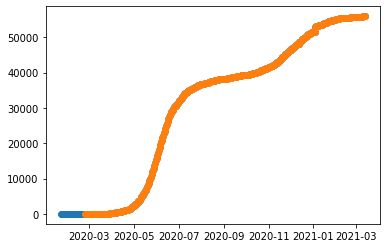

In [49]:
plt.scatter(data_ox[data_ox.iso_code == 'AFG'].date, data_ox[data_ox.iso_code == 'AFG'][['total_cases']])
plt.scatter(data_owid[data_owid.iso_code == 'AFG'].date, data_owid[data_owid.iso_code == 'AFG'][['total_cases']])

In [53]:
data_all = pd.merge(data_ox_n, data_owid, how='inner', left_on=['iso_code', 'date'], right_on = ['iso_code', 'date'])